<font style='font-size:1.5em'>**Initial Data Analysis**</font>

<font style='font-size:1.2em'>Using Reddit CSV</font>

**Author: Sentipedia**  

**Course: DS105L Project** 

**DATE: 3/29/2023** 

---


## Import

### Importing Libraries 

In [139]:
# importing libraries for web scrapping and API acess
import requests
from bs4 import BeautifulSoup

# importing libraries for dataframes 
import pandas as pd
import numpy as np

# importing libraries for plots 
from plotnine import *

# importing libraries for ploting networks
import networkx as nx
import matplotlib.pyplot as plt

# import language model 
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, ne_chunk

# downloading NLTK analyzers 
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('maxent_ne_chunker')
nltk.download('words')

# import libraries for plotnine
from plotnine import *

# import ggthemes
from plotnine.themes import theme_bw

# import torch and transformers
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

[nltk_data] Downloading package punkt to /Users/ap/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/ap/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ap/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/ap/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/ap/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/ap/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/ap/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package wo

# Data

### Cleaing the Data

In [78]:
# dataframe with all replies in the UK subreddit
df_reddit_full = pd.read_csv('reddit_full.csv', usecols=['url', 'comment', 'comment_id'])
df_reddit_full['comment'].replace('[deleted]', None, inplace=True)

# dataframe with only replies related to Brexit in the UK subreddit
df_reddit_brexit = pd.read_csv('reddit_brexit.csv', usecols=['url', 'comment', 'comment_id'])
df_reddit_brexit['comment'].replace('[deleted]', None, inplace=True)

# Using NLTK

### Initializing NLTK Tools

In [4]:
# define lemmatizer, stop words and analyzer for nltk
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
analyzer = SentimentIntensityAnalyzer()

### Basic Sentiment Analysis Using Vader on all Comments

In [83]:
# looking at sentiment scores for the full dataset
df_reddit_full_nltk = df_reddit_full.head(1000).copy()

# define function to preprocess text
def text_preprocess(comment):
    try:
        # tokenize comments and preprocess text for sentiment analysis
        preprocessed_tokens = [word.lower() for word in word_tokenize(comment)]        
        preprocessed_tokens = [word for word in preprocessed_tokens if word not in stop_words]        
        preprocessed_tokens = [lemmatizer.lemmatize(word) for word in preprocessed_tokens]        
        preprocessed_tokens = [word for word in preprocessed_tokens if (len(word) > 1) and (word.isalpha()) and (word.isalnum())]
        return preprocessed_tokens
    except:
        return None

# define function to get sentiment scores
def get_score_nltk(tokens):
    try:
        # use sentiment analyzer from NLTK to get sentiment scores
        preprocessed_text = ' '.join(tokens)
        sentiment_scores = analyzer.polarity_scores(preprocessed_text)
        return sentiment_scores['compound']
    except:
        return None

In [84]:
# apply functions to get sentiment scores
df_reddit_full_nltk['tokens'] = df_reddit_full_nltk['comment'].apply(text_preprocess)
df_reddit_full_nltk['score'] = df_reddit_full_nltk['tokens'].apply(get_score_nltk)
df_reddit_full_nltk

,url,comment,comment_id,tokens,score
0,https://www.reddit.com/r/unitedkingdom/comment...,None,1,None,NaN
1,https://www.reddit.com/r/unitedkingdom/comment...,None,1_1,None,NaN
2,https://www.reddit.com/r/unitedkingdom/comment...,None,1_1_1,None,NaN
3,https://www.reddit.com/r/unitedkingdom/comment...,Small capitalism,1_1_1_1,"[small, capitalism]",0.0000
4,https://www.reddit.com/r/unitedkingdom/comment...,Mixed economy.,1_1_1_1_1,"[mixed, economy]",0.0000
...,...,...,...,...,...
995,https://www.reddit.com/r/unitedkingdom/comment...,That's only true if he sticks to May's red lin...,5_2,"[true, stick, may, red, line, done, good, job,...",0.5423
996,https://www.reddit.com/r/unitedkingdom/comment...,"He wants to negotiate our own trade deals, and...",5_2_1,"[want, negotiate, trade, deal, subject, rule, ...",0.7650
997,https://www.reddit.com/r/unitedkingdom/comment...,Maybe if shills didnt keep parroting the Tory...,5_3,"[maybe, shill, keep, parroting, tory, line, de...",0.1027
998,https://www.reddit.com/r/unitedkingdom/comment...,"They're not even shills, just useful idiots.",5_3_1,"[even, shill, useful, idiot]",-0.1027


### Basic Sentiment Analysis Using Vader on Comments Mentioning Brexit

In [85]:
# looking at sentiment scores for the Brexit dataset
df_reddit_brexit_nltk = df_reddit_brexit.head(1000).copy()

# apply functions to get sentiment scores
df_reddit_brexit_nltk['tokens'] = df_reddit_brexit_nltk['comment'].apply(text_preprocess)
df_reddit_brexit_nltk['score'] = df_reddit_brexit_nltk['tokens'].apply(get_score_nltk)
df_reddit_brexit_nltk

,url,comment,comment_id,tokens,score
0,https://www.reddit.com/r/unitedkingdom/comment...,"Agree. With the Tories pushing Brexit, they h...",1_2_1_4_1,"[agree, tory, pushing, brexit, become, resting...",-0.4019
1,https://www.reddit.com/r/unitedkingdom/comment...,I just thought that with plenty of vaccination...,1_8_1_1,"[thought, plenty, vaccination, coming, brexit,...",0.7845
2,https://www.reddit.com/r/unitedkingdom/comment...,"If you don't listen to your core voter base, t...",1_11_1_1,"[listen, core, voter, base, wo, vote, labour, ...",0.0258
3,https://www.reddit.com/r/unitedkingdom/comment...,Much as I agree with your potential projection...,1_15,"[much, agree, potential, projection, overwhelm...",0.2960
4,https://www.reddit.com/r/unitedkingdom/comment...,"Brexit, the word, is why it succeeded. Nobody ...",2,"[brexit, word, succeeded, nobody, would, enthu...",0.8316
...,...,...,...,...,...
995,https://www.reddit.com/r/unitedkingdom/comment...,"Exactly, many interpreted it as a vote for a ...",2_2_1_1_2_1,"[exactly, many, interpreted, vote, brexit, oth...",0.0000
996,https://www.reddit.com/r/unitedkingdom/comment...,Just because parties committed to implimenting...,2_2_1_1_3_1,"[party, committed, implimenting, brexit, lot, ...",0.7430
997,https://www.reddit.com/r/unitedkingdom/comment...,I understand that but to persuade the EU27 tha...,2_2_2_1,"[understand, persuade, exists, actual, mandate...",0.2960
998,https://www.reddit.com/r/unitedkingdom/comment...,&gt; The whole partnership is damaged and the ...,2_5_1,"[gt, whole, partnership, damaged, way, move, f...",0.7964


### Extracting Themes from Comments with Positive/Negative Sentiment for All Comments

In [111]:
# define function to get all nouns from tokens 
def get_nouns(tokens):
    try:
        nouns = [word for (word, pos) in pos_tag(tokens) if (pos and pos.startswith('N'))]
        return nouns
    except:
        return None
    
# define function to get all adjectives from tokens
def get_adjectives(tokens):
    try:
        adjectives = [word for (word, pos) in pos_tag(tokens) if (pos and pos.startswith('J'))]
        return adjectives
    except:
        return None
    
# define function to get all verbs from tokens
def get_verbs(tokens):
    try:
        verbs = [word for (word, pos) in pos_tag(tokens) if (pos and pos.startswith('V'))]
        return verbs
    except:
        return None

In [112]:
# apply functions to get nouns, adjectives and verbs tokens
df_reddit_full_nltk['nouns'] = df_reddit_full_nltk['tokens'].apply(get_nouns)
df_reddit_full_nltk['adjectives'] = df_reddit_full_nltk['tokens'].apply(get_adjectives)
df_reddit_full_nltk['verbs'] = df_reddit_full_nltk['tokens'].apply(get_verbs)

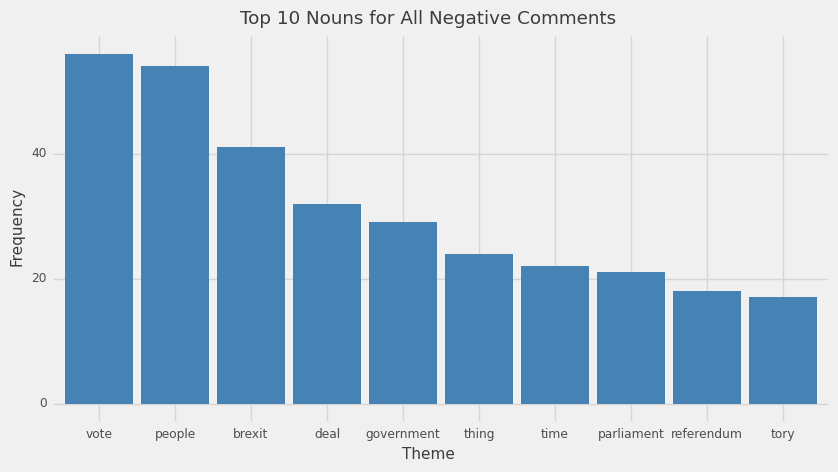

<ggplot: (8792955388594)>

In [144]:
# identify nouns of negative comments
negative_full_nouns = []
negative_full_nouns_series = df_reddit_full_nltk.loc[df_reddit_full_nltk['score'] < 0, 'nouns']

for value in negative_full_nouns_series: 
    for word in value:
        negative_full_nouns.append(word)

temp = pd.DataFrame({'theme': negative_full_nouns})
frequency = temp['theme'].value_counts().reset_index()
frequency.columns = ['theme', 'count']
top_10 = frequency.head(10)

# plot top 10 nouns for negative comments
plot = (
    ggplot(data=top_10) +
    aes(x='reorder(theme, -count)', y='count') +
    geom_bar(stat='identity', fill='steelblue') +
    xlab('Theme') +
    ylab('Frequency') +
    ggtitle('Top 10 Nouns for All Negative Comments') + 
    theme_538() +
    theme(figure_size=(10, 5),text=element_text(family='mono'))
)

plot


In [ ]:
# identify nouns of positive comments
positive_full_nouns = []
positive_full_nouns_series = df_reddit_full_nltk.loc[df_reddit_full_nltk['score'] > 0, 'nouns']

for value in positive_full_nouns_series:
    for word in value:
        positive_full_nouns.append(word)

In [ ]:
# identify adjectives of negative comments
negative_full_adj = []
negative_full_adj_series = df_reddit_full_nltk.loc[df_reddit_full_nltk['score'] < 0, 'adjectives']

for value in negative_full_adj_series: 
    for word in value:
        negative_full_adj.append(word)

# identify adjectives of positive comments
positive_full_adj = []
positive_full_adj_series = df_reddit_full_nltk.loc[df_reddit_full_nltk['score'] > 0, 'adjectives']

for value in positive_full_adj_series:
    for word in value:
        positive_full_adj.append(word)

In [ ]:
# identify verbs of negative comments
negative_full_verbs = []
negative_full_verbs_series = df_reddit_full_nltk.loc[df_reddit_full_nltk['score'] < 0, 'verbs']

for value in negative_full_verbs_series: 
    for word in value:
        negative_full_verbs.append(word)

# identify verbs of positive comments
positive_full_verbs = []
positive_full_verbs_series = df_reddit_full_nltk.loc[df_reddit_full_nltk['score'] > 0, 'verbs']

for value in positive_full_verbs_series:
    for word in value:
        positive_full_verbs.append(word)

### Extracting Themes from Comments with Positive/Negative Sentiment on All Comments

In [ ]:
# apply functions to get nouns, adjectives and verbs tokens
df_reddit_brexit_nltk['nouns'] = df_reddit_brexit_nltk['tokens'].apply(get_nouns)
df_reddit_brexit_nltk['adjectives'] = df_reddit_brexit_nltk['tokens'].apply(get_adjectives)
df_reddit_brexit_nltk['verbs'] = df_reddit_brexit_nltk['tokens'].apply(get_verbs)

In [ ]:
# identify nouns of negative comments
negative_brexit_nouns = []
negative_brexit_nouns_series = df_reddit_brexit_nltk.loc[df_reddit_brexit_nltk['score'] < 0, 'nouns']

for value in negative_brexit_nouns_series: 
    for word in value:
        negative_brexit_nouns.append(word)

# identify nouns of positive comments
positive_brexit_nouns = []
positive_brexit_nouns_series = df_reddit_brexit_nltk.loc[df_reddit_brexit_nltk['score'] > 0, 'nouns']

for value in positive_brexit_nouns_series:
    for word in value:
        positive_brexit_nouns.append(word)

In [ ]:
# identify adjectives of negative comments
negative_brexit_adj = []
negative_brexit_adj_series = df_reddit_brexit_nltk.loc[df_reddit_brexit_nltk['score'] < 0, 'adjectives']

for value in negative_brexit_adj_series: 
    for word in value:
        negative_brexit_adj.append(word)

# identify adjectives of positive comments
positive_brexit_adj = []
positive_brexit_adj_series = df_reddit_brexit_nltk.loc[df_reddit_brexit_nltk['score'] > 0, 'adjectives']

for value in positive_brexit_adj_series:
    for word in value:
        positive_brexit_adj.append(word)

In [ ]:
# identify verbs of negative comments
negative_brexit_verbs = []
negative_brexit_verbs_series = df_reddit_brexit_nltk.loc[df_reddit_brexit_nltk['score'] < 0, 'verbs']

for value in negative_brexit_verbs_series: 
    for word in value:
        negative_brexit_verbs.append(word)

# identify verbs of positive comments
positive_brexit_verbs = []
positive_brexit_verbs_series = df_reddit_brexit_nltk.loc[df_reddit_brexit_nltk['score'] > 0, 'verbs']

for value in positive_brexit_verbs_series:
    for word in value:
        positive_brexit_verbs.append(word)

# Using DistilBERT Model

In [9]:
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'classifier.weight', 'pre_clas

In [10]:
df_reddit_DistilBERT = df_reddit.head(10).copy()

def get_score_DistilBERT (comment):
    encoded_input = tokenizer(comment, return_tensors='pt')
    output = model(**encoded_input)
    sentiment_score = output.logits.detach().numpy()[0]
    return sentiment_score``

: 

: 

In [ ]:
df_reddit_DistilBERT['score'] = df_reddit_DistilBERT['comment'].apply(get_score_DistilBERT)
df_reddit_DistilBERT

,url,comment,comment_id,score
0,https://www.reddit.com/r/unitedkingdom/comment...,"Agree. With the Tories pushing Brexit, they h...",1_2_1_4_1,"[-0.14808065, -0.17506288]"
1,https://www.reddit.com/r/unitedkingdom/comment...,I just thought that with plenty of vaccination...,1_8_1_1,"[-0.15040019, -0.16356972]"
2,https://www.reddit.com/r/unitedkingdom/comment...,"If you don't listen to your core voter base, t...",1_11_1_1,"[-0.14527896, -0.19329615]"
3,https://www.reddit.com/r/unitedkingdom/comment...,Much as I agree with your potential projection...,1_15,"[-0.12925428, -0.2017273]"
4,https://www.reddit.com/r/unitedkingdom/comment...,"Brexit, the word, is why it succeeded. Nobody ...",2,"[-0.10443308, -0.20493583]"
5,https://www.reddit.com/r/unitedkingdom/comment...,"""Brexit means Brexit""... =""\n\nThe one stand o...",2_1_3,"[-0.12687565, -0.19886912]"
6,https://www.reddit.com/r/unitedkingdom/comment...,The word actually wasnt really used much anyw...,2_2,"[-0.1233595, -0.21118498]"
7,https://www.reddit.com/r/unitedkingdom/comment...,"It was used, but only as a kind of novelty ter...",2_2_1_1_1_1,"[-0.1240364, -0.23696531]"
8,https://www.reddit.com/r/unitedkingdom/comment...,This is exact right - the portmanteau of Grex...,2_2_1_1_1_1_1,"[-0.10308735, -0.21843742]"
9,https://www.reddit.com/r/unitedkingdom/comment...,Its probably somewhere between the two of us ...,2_2_1_1_1_2,"[-0.16160363, -0.21258013]"


In [ ]:
text = "I think life is amazing and everything is great."
#text = "I think Brexit is stupid and it should not have happened."
encoded_input = tokenizer(text, return_tensors='pt')
output = model(**encoded_input)
sentiment_score = output.logits.detach().numpy()[0]
sentiment_score

array([-0.12553023, -0.1777198 ], dtype=float32)

# Using DistilBERT Model (Cosine Similarity)

In [ ]:
df_reddit_DistilBERT = df_reddit.copy()

In [ ]:
def get_reference_id(num):
    try:
        num_list = num.split("_")
    
        if len(num_list) > 1:
            num_list.pop()

        concat_num = '_'.join(num_list)   
        return concat_num
    except: 
        return 'NA'
    
def get_reference(url, reference_id):
    try:
        index = df_reddit.index[(df_reddit['comment_id'] == reference_id) & (df_reddit['url'] == url)]
        index_int = index.values.tolist()[0]
        reference_comment = df_reddit['comment'][index_int]
        return reference_comment        
    except:
        return 'NA'

In [ ]:
pd.reset_option("display.max_colwidth")

In [ ]:
df_reddit_DistilBERT['reference_id'] = df_reddit_DistilBERT['comment_id'].apply(get_reference_id)
df_reddit_DistilBERT['reference_comment'] = df_reddit_DistilBERT.apply(lambda row: get_reference(row['url'], row['reference_id']), axis = 1)
df_reddit_DistilBERT = df_reddit_DistilBERT.reindex(columns=['url', 'comment', 'comment_id', 'reference_comment', 'reference_id'])

In [ ]:
df_reddit_DistilBERT

,url,comment,comment_id,reference_comment,reference_id
0,https://www.reddit.com/r/unitedkingdom/comment...,"Agree. With the Tories pushing Brexit, they h...",1_2_1_4_1,NA,1_2_1_4
1,https://www.reddit.com/r/unitedkingdom/comment...,I just thought that with plenty of vaccination...,1_8_1_1,NA,1_8_1
2,https://www.reddit.com/r/unitedkingdom/comment...,"If you don't listen to your core voter base, t...",1_11_1_1,NA,1_11_1
3,https://www.reddit.com/r/unitedkingdom/comment...,Much as I agree with your potential projection...,1_15,NA,1
4,https://www.reddit.com/r/unitedkingdom/comment...,"Brexit, the word, is why it succeeded. Nobody ...",2,"Brexit, the word, is why it succeeded. Nobody ...",2
...,...,...,...,...,...
11709,https://www.reddit.com/r/unitedkingdom/comment...,"By Britain they don't mean ordinary people, mo...",20_1_1,NA,20_1
11710,https://www.reddit.com/r/unitedkingdom/comment...,Because the people on the leave side see this ...,22,Because the people on the leave side see this ...,22
11711,https://www.reddit.com/r/unitedkingdom/comment...,Because ultimately it is the houses of parliam...,24,Because ultimately it is the houses of parliam...,24
11712,https://www.reddit.com/r/unitedkingdom/comment...,"Democracy changes laws and governments, but po...",35,"Democracy changes laws and governments, but po...",35


In [ ]:
from transformers import DistilBertTokenizer, DistilBertModel

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertModel.from_pretrained('distilbert-base-uncased')

statement1 = "The sky is blue."
statement2 = "The sky is green."

encoded_statement1 = tokenizer.encode(statement1, return_tensors='pt')
encoded_statement2 = tokenizer.encode(statement2, return_tensors='pt')

with torch.no_grad():
    vector1 = model(encoded_statement1)[0][:, 0, :].numpy()
    vector2 = model(encoded_statement2)[0][:, 0, :].numpy()

from sklearn.metrics.pairwise import cosine_similarity

similarity = cosine_similarity(vector1, vector2)
print(similarity)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.weight', 'vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[[0.99577045]]
